# Lecture 8: Diagnostic  Checking & Introduction to Forecasting

> From last time, fitted **AR(1)** model to  bread price data

Let's load  that bread price data up before looking at Overfitting as a diagnostic tool for model selection.

In [1]:
price <- c(5.8, 6.1, 5.4, 6.2, 5.0, 4.6, 5.8, 5.1, 5.3, 5.1, 4.8, 5.3, 6.8, 9.0, 8.6, 
9.0, 7.4, 6.4, 4.8, 3.9, 3.9, 5.6, 5.7, 7.5, 7.3, 7.4, 7.5, 9.7, 6.1, 6.0, 5.7, 5.0, 
4.2, 4.6, 5.9, 5.4, 5.4, 5.4, 5.6, 7.6, 7.4, 5.4, 5.1, 6.9, 7.5, 5.9, 6.2, 5.6, 5.8, 
5.6, 6.6, 4.8, 5.2, 4.5, 4.4, 5.3, 5.0, 6.4, 7.8, 8.5, 5.6, 7.1, 7.1, 8.0, 7.3, 5.7, 
4.8, 4.3, 4.4, 5.7, 4.7, 4.1, 4.1, 4.7, 7.0, 8.7, 6.2, 5.9, 5.4, 6.3, 4.9, 5.5, 5.4, 
4.7, 4.1, 4.6, 4.8, 4.5, 4.7, 4.8, 5.4, 6.0, 5.1, 6.5, 6.2, 4.6, 4.5, 4.0, 4.1, 4.7,
5.1, 5.2, 5.3, 4.8, 5.0, 6.2, 6.4, 4.7, 4.1, 3.9, 4.0, 4.9, 4.9, 4.8, 5.0, 4.9, 4.9, 
5.4, 5.6, 5.0, 4.5, 5.0, 7.2, 6.1)

In [99]:
BP.ts <- ts(price, start=1634, frequency = 1)

In [106]:
BP.train <- ts(price[1:104], start=1634, frequency = 1)

In [107]:
BP.test <- ts(price[105:124], start=(1634+104), frequency = 1)

### **AR(1)**

In [111]:
# fitting an ARIMA(1,0,0) model
## which is  the same as fitting an AR(1) model
BP.ar.1 <- arima(BP.train, order=c(1,0,0))

In [112]:
# can see we have a single coefficient - the phi_1 parameter - and it's standard error
## note also the similarity between the above estimate of phi_1 = 0.647 and R's MLE estimation of phi_1 to be 0.6429
BP.ar.1


Call:
arima(x = BP.train, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.6396     5.7389
s.e.  0.0744     0.2580

sigma^2 estimated as 0.9296:  log likelihood = -144.04,  aic = 294.08

# **Lecture 8**

# **8.1 Overfitting**

> Overfitting is a method of diagnostic checking

> Once you think you have an appropriate model (i.e. AR(1) in this case), fit a more general model with an extra parameter, and estimate whether the additional paramater value, taking the standard error of the additional parameter into account, differs significantly from zero.

> If the extra parameter doesn't significantly add anything (i.e. the parameter's 95% confidence interval  includes **zero**) then you  can be more confident rejecting the model with the additional parameter and keeping with your initial model.

> So we try and fit an AR(2) model...

In [8]:
BP.ar.2 <- arima(BP.ts, order=c(2,0,0))

In [9]:
BP.ar.2


Call:
arima(x = BP.ts, order = c(2, 0, 0))

Coefficients:
         ar1      ar2  intercept
      0.7231  -0.1235     5.6546
s.e.  0.0888   0.0892     0.2051

sigma^2 estimated as 0.8521:  log likelihood = -166.31,  aic = 340.62

> And find that the second parameter has a value of -0.1235 with a standard error of 0.892

> This gives us a t-statistic of -0.1235 / 0.0892

In [240]:
t_stat <- -0.1235 / 0.0892
t_stat

[1] -1.384529

> And we want to know, for that t-statistic, what's the probability of observing an equal or more extreme value by chance, if the paramater is really 0.

> So you're after the  probability distribution function, for P(X <= x), where x here is -1.38

In [35]:
# we say  that lower.tail = TRUE because we want to look at the extremes
## so you're looking at  the probability of the t-distribution having a value of less
## than the t-stat you see, or more than the negative of the t-stat you see

## if you had a positive t-value, like 1.6, then you'd do P(X > x)
## you pick lower.tail because you're dealing  with a negative t-stat
2*pt(t_stat, 120, lower.tail = TRUE)

[1] 0.1687656

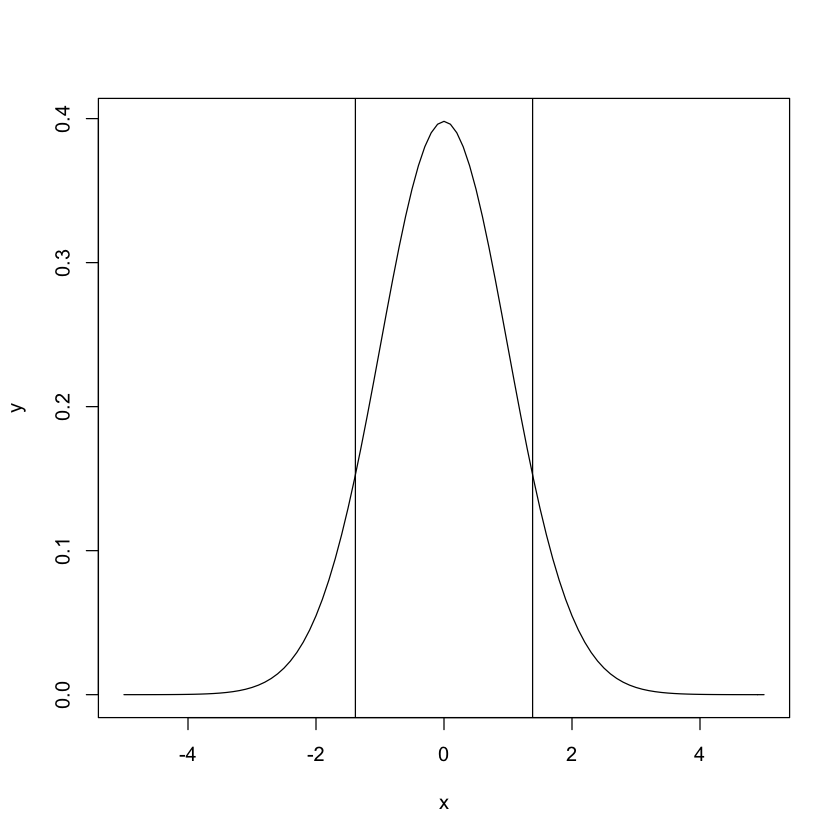

In [36]:
x <- seq(-5,5,0.1)
y <- dt(x, 120)

plot (x,y,type='l')
abline(v=t_stat)
abline(v=-t_stat)

> Since the second parameter is not significant at the 5% level, we reject the usage of the second paramter, and stick with the AR(1) model, rather than going for the extra parameter with the AR(2) model.

> This conclusion is inline with AIC + parsimony.

# **8.2** Diagnostic checking  of the residuals

## Checking the adequecy of the model

> Examining  the residials - the fitted data Vs the observed data

> We would expect the residuals to have no trend - and for the residuals to appear to be from a white noise process

> The resisuals should be uncorrelated with each other, with mean zero.

> May also wish to assume that the white noise residuals are normally  distributed... so maybe we could also try out a qq plot

## Residuals, $e_{t}$:

$e_{t} = y_{t} - \hat{y}_{t}$,

where $\hat{y}_{t}$ is the fitted value, given for the AR(1) model by:

> $\hat{y}_{t} - \hat{\mu} = \phi(y_{t-1} - \hat{\mu})$,

because the ARIMA model you have produced has translated $Y_{t} \rightarrow Y_{t} - \mu$, but when we actually use real data we of course input $y_{t}$ rather than $y_{t} - \hat{\mu}$, where we have to estimate the sample mean $\hat{\mu}$, as we don't know the population mean $\mu$.

This equation involving $\hat{y}_{t}$ can be re-arranged to be:

> $\hat{y}_{t} = (1 - \hat{\phi})\hat{\mu} + \hat{\phi} y_{t-1}, 2 \leq t \leq T$.

## Standardised residuals:

These are the  residuals  normalised by the variance of the white noise, $\epsilon_{t}$.

> Standardised residuals, $d_{t} = e_{t} / \hat{\sigma}^{2}$.

> Can then examine the ACF plot of the standardised residuals, to see if there's autocorrelation between standardised residuals, and to deduce whether the residuals represent  a white noise  process.

>  We have the 95% confidence bands in the ACF, so after $\rho_{0}$ = 1, we expect most residuals to fall below this white noise 95% probability limit - and only see about 1/20 data points fall above the 95% probability bands.

> the **tsdiag** function in R produces both a plot of the standardised residuals, as well as an ACF + 95% confidence band plot, as well as a third plot which we'll look at later...

# **8.3**: Bread Price Example: Diagnostic Checking

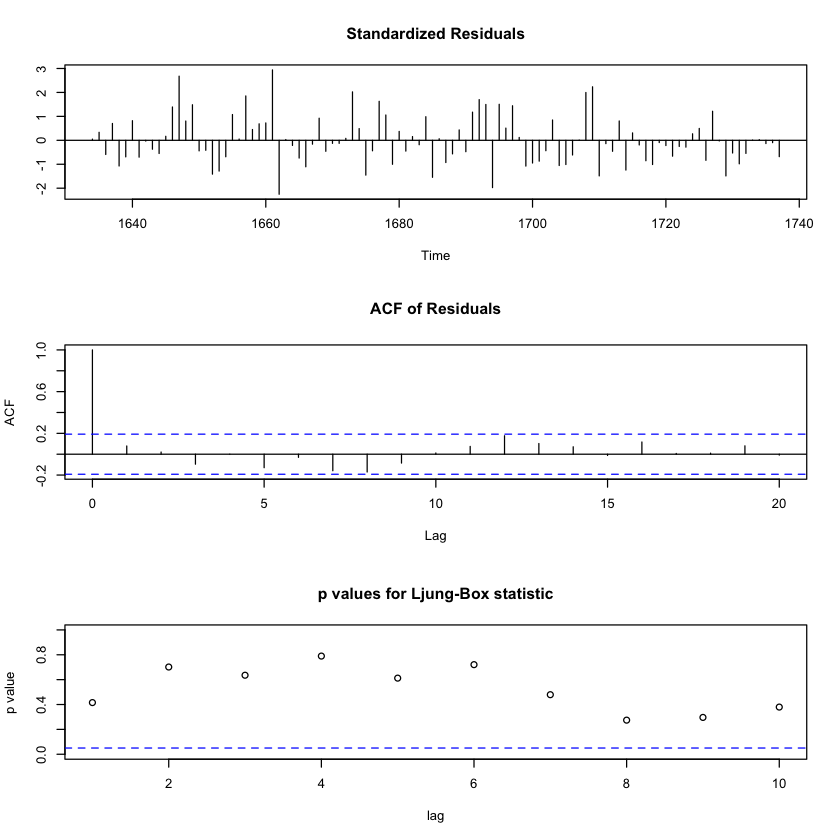

In [139]:
# the tsdiag function is specifically for ARIMA model diagnostics
tsdiag(BP.ar.1)

# **8.4** The portmanteau statistics

> Given a lag $K$, the **Box-Pierce** test statistic based upon the first $K$ autocorrections is:

> $Q^{*}_{K} = T \sum^{K}_{\tau = 1} r^{2}_{\tau}$

> where $r_{\tau}$ here is the sample autocorrelations **of the residuals**.

If $r_{\tau}$ **ARE** the sample autocorrelations from the residuals from fitting an ARMA(p,d,q) model, and **the model is correct**, then the $Q^{*}_{K}$ should follow a chi-squared distribution, $\chi^{2}_{K-p-q}$.

An **improved** statistic is the **Ljung-Box** statistic. This is the statistic that's produced by R's *tsdiag* function.

> The Ljung-Box statistic is:

> $Q_{K} = T(T+2) \sum^{K}_{\tau=1} r^{2}_{\tau} / (T - \tau)$

Where K is the lag you're determining the statistic at, T is the size of the sample, $r_{\tau}$ is the autocorrelation at lag $\tau$ *of the residuals*.

> This is sufficiently complicated that I don't think we'd ever get given a tough question on this in an exam, and I don't think we'd need to remember this equation...

> *tsdiag* computes $Q_{K}$ (but doesn't show it)

> you get a p-value per lag

> this is the p-value associated with each $Q_{K}$ statistic on a chi-squared distribution with $K-p-q$ degrees of freedom.

> if any  of  these $Q_{K}$ values is significant, then we may reject the null hypothesis that the model is correct

> So with **Ljung-Box**  diagnostics we're  running a hypothesis test, and we may reject the model if a lag is found to be significant at the 5% level.

> As no $Q_{K}$ falls within the 5% significance level, we choose not to reject the null  hypothesis, and thus we accept the AR(1) model.

> **The AR(1) model is deemed adequete.**

# **8.5** Airline passenger data

> From lecture 3

In [142]:
passengers<-c(112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115, 126,
              +141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150, 178, 163, 172, 178,
              +199, 199, 184, 162, 146, 166, 171, 180, 193, 181, 183, 218, 230, 242, 209, 191,
              +172, 194, 196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201, 204, 188,
              +235, 227, 234, 264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
              +364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413, 405, 355, 306,
              +271, 306, 315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336, 340, 318,
              +362, 348, 363, 435, 491, 505, 404, 359, 310, 337, 360, 342, 406, 396, 420, 472,
              +548, 559, 463, 407, 362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461,
              +390, 432)

In [150]:
air.ts <- ts(passengers, start=1950, frequency = 12)

In [151]:
air.ts

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : formal argument "cols" matched by multiple actual arguments

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = erro

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1950,112,118,132,129,121,135,148,148,136,119,104,118
1951,115,126,141,135,125,149,170,170,158,133,114,140
1952,145,150,178,163,172,178,199,199,184,162,146,166
1953,171,180,193,181,183,218,230,242,209,191,172,194
1954,196,196,236,235,229,243,264,272,237,211,180,201
1955,204,188,235,227,234,264,302,293,259,229,203,229
1956,242,233,267,269,270,315,364,347,312,274,237,278
1957,284,277,317,313,318,374,413,405,355,306,271,306
1958,315,301,356,348,355,422,465,467,404,347,305,336
1959,340,318,362,348,363,435,491,505,404,359,310,337


## Will now start a sequence of plotting, logging, and differencing to produce a stationary process to model using ARIMA.

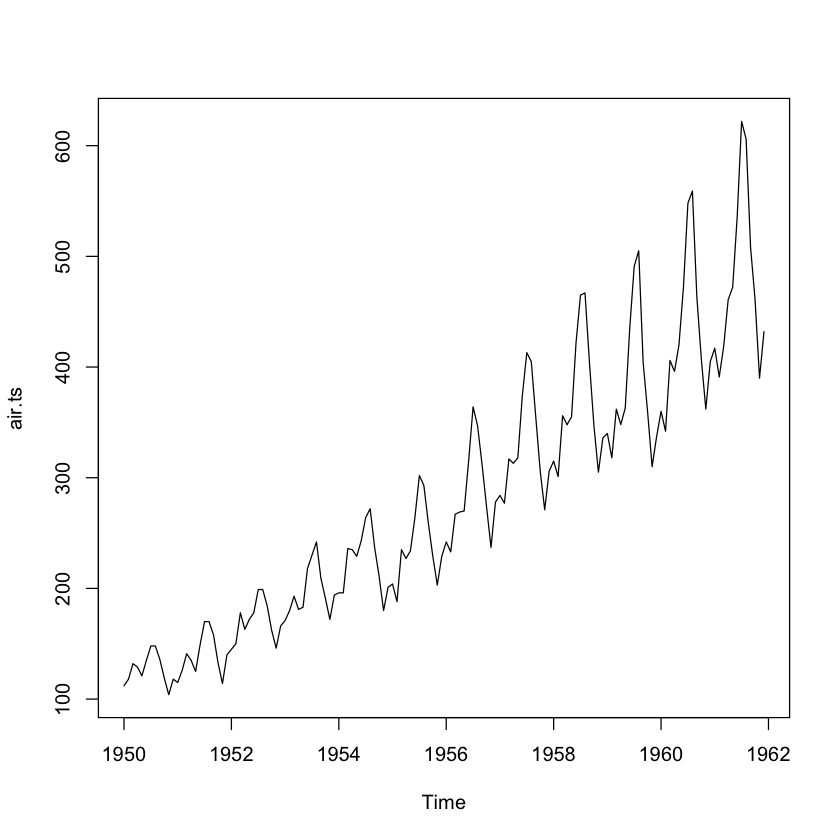

In [180]:
plot(air.ts)

> Can see that the variance is increasing  with time.

---

## Logging the time series to reduce that increasing variance with time.

In [152]:
lair.ts <- log(air.ts)

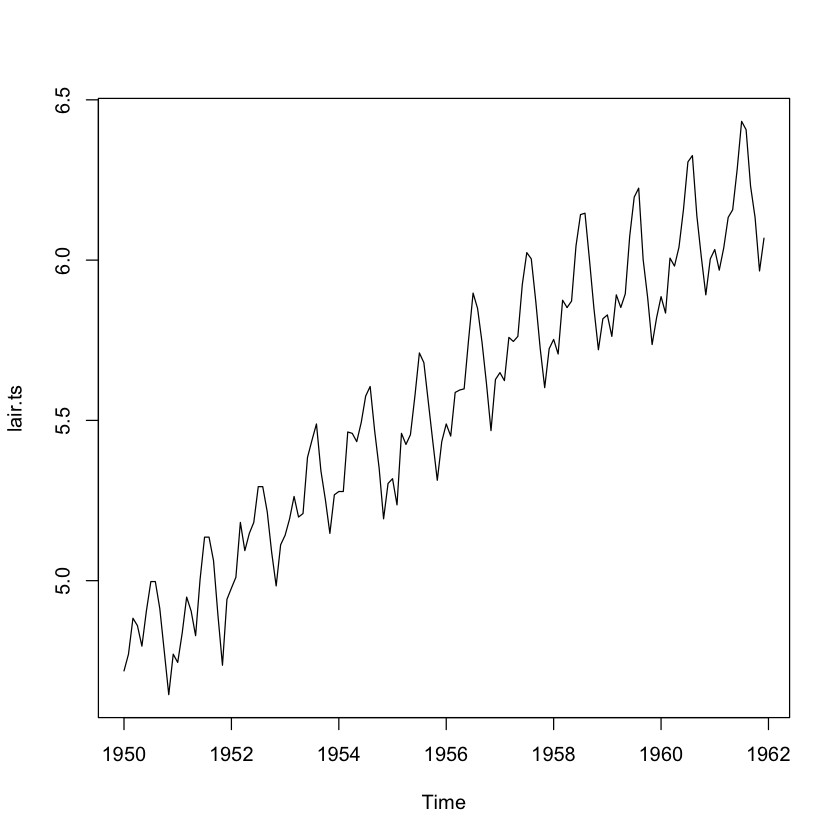

In [153]:
plot(lair.ts)

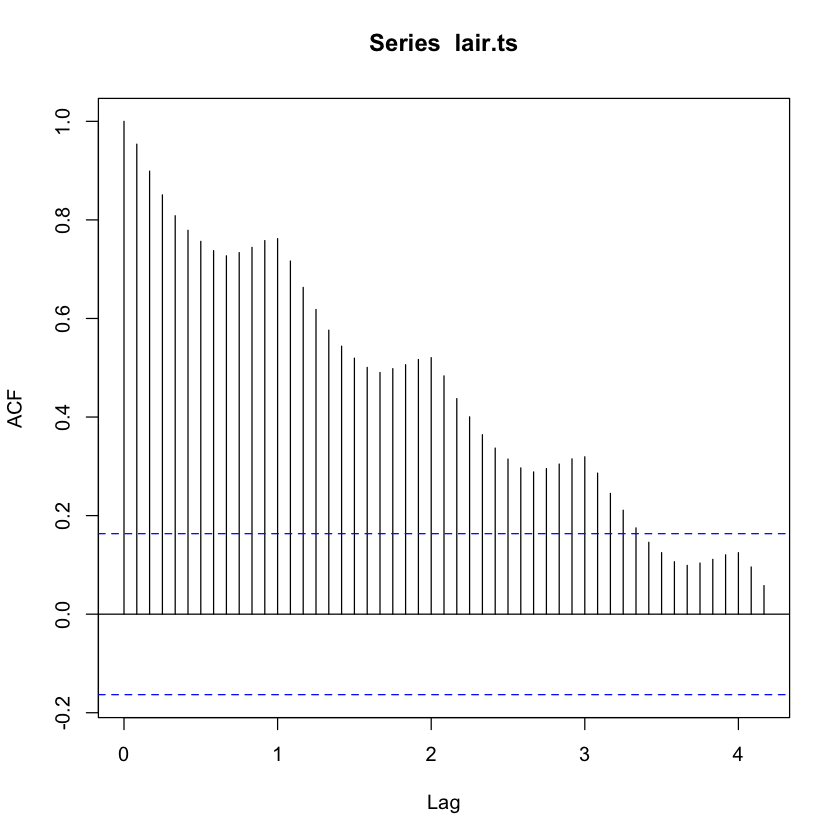

In [156]:
lair.acf <- acf(lair.ts, 50)

> Now we see that the variance is relatively constant with increasing time.

> There's still obvious seasonalilty and general trend though in the time series.

> And the auto correlation function has a very slow decrease towards zero.

---

> Let's difference to try and remove some of  that seasonality and trend

> $\Delta y_{t} = (1 - L)y_{t} = y_{t} - y_{t-1}$

In [181]:
laird.ts <- diff(lair.ts)

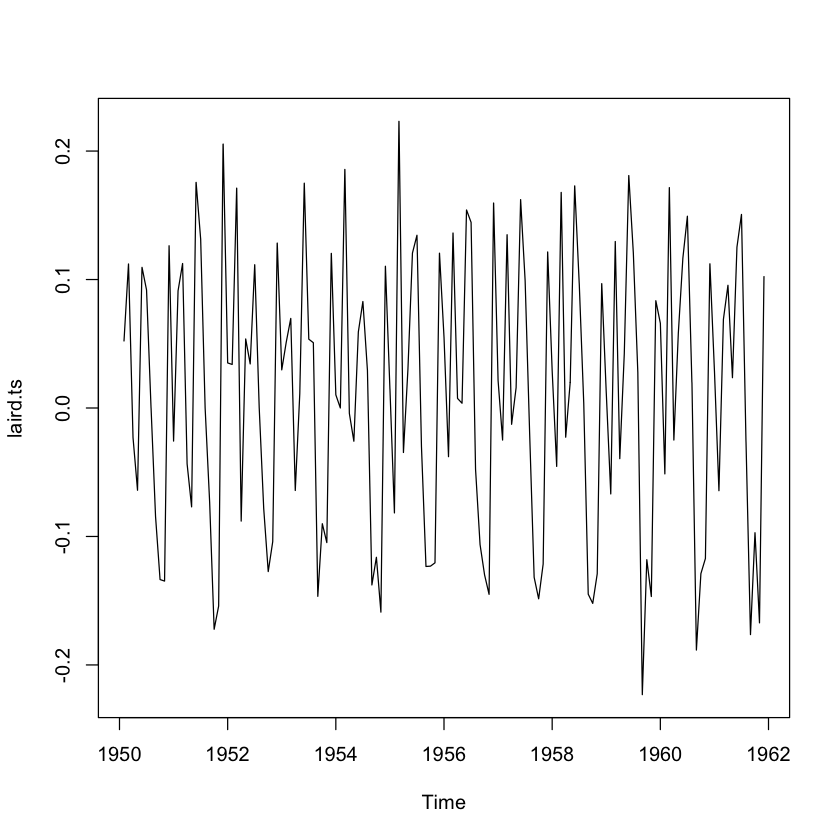

In [182]:
plot(laird.ts)

> That's  cut  out a lot of the general trend, but  there's still some seasonality that you can clearly  see in the ACF:

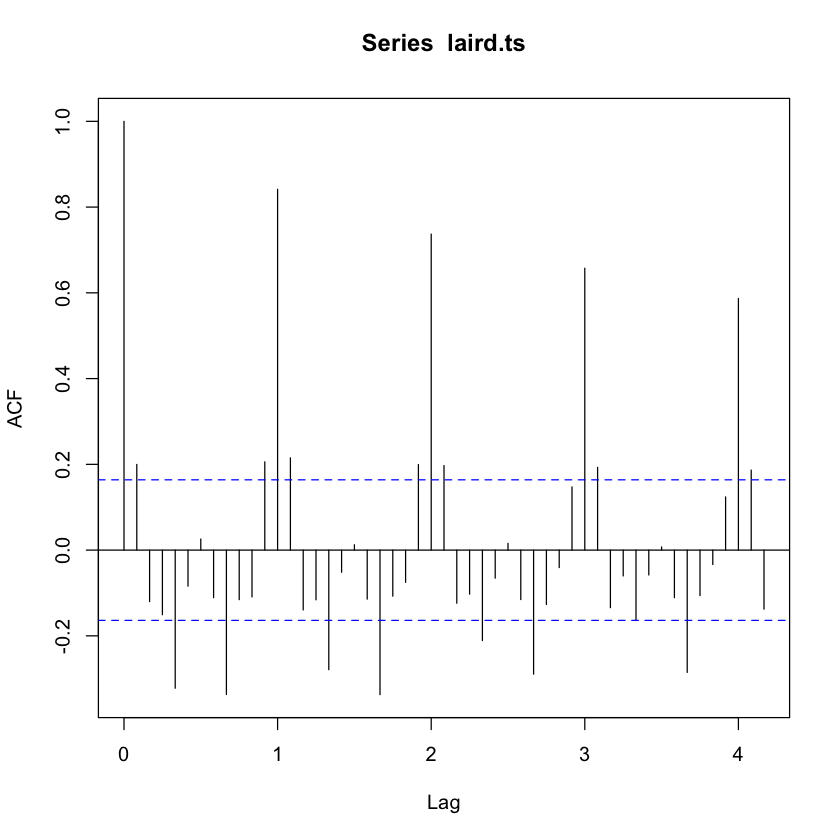

In [184]:
laird.acf <- acf(laird.ts, 50)

---

## So differencing using $\Delta_{s}$, where s is the frequency  of the seasonality that we're trying to remove from the non-stationary process before  we can model it.

> We notice  from the ACF that there's correlation occuring  at the 12 month lags (i.e. there's some annual seasonality in the  data)

>  So now differencing by applying $\Delta_{12}$ such  that our process is now $\{\Delta_{12} \Delta y_{t}\}$

In [191]:
lairdd.ts <- diff(laird.ts, lag=12)

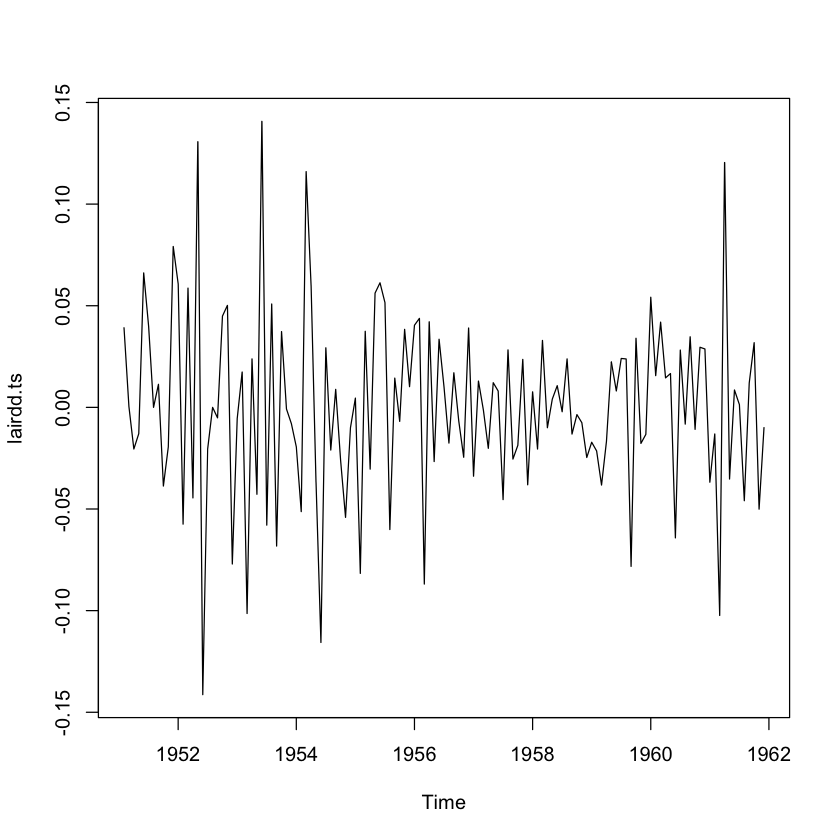

In [192]:
plot(lairdd.ts)

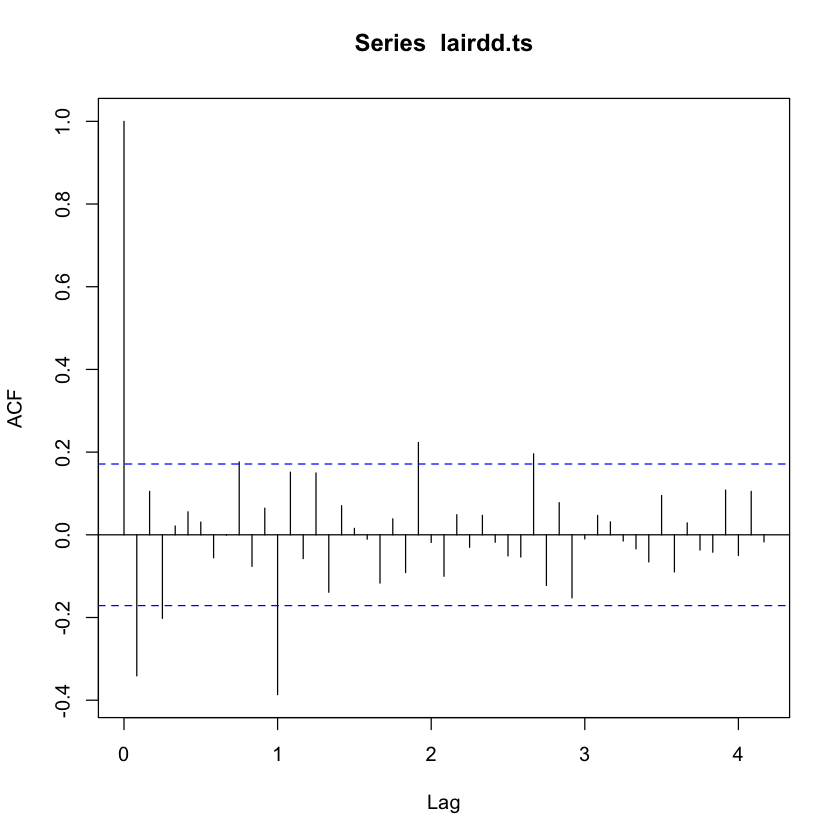

In [193]:
lairdd.acf <- acf(lairdd.ts, 50)

In [199]:
lag <- 0:50

In [200]:
lair <- lair.acf$acf
laird <- laird.acf$acf
lairdd <- lairdd.acf$acf

In [201]:
airacf <- data.frame(lag, lair, laird, lairdd)

In [202]:
airacf

lag,lair,laird,lairdd
0,1.00000000,1.00000000,1.0000000000
1,0.95370337,0.19975134,-0.3411237983
2,0.89891595,-0.12010433,0.1050467496
3,0.85080249,-0.15077204,-0.2021386642
4,0.80842517,-0.32207432,0.0213592288
5,0.77889939,-0.08397453,0.0556543435
6,0.75644222,0.02577843,0.0308036696
7,0.73760171,-0.11096075,-0.0555785695
8,0.72713135,-0.33672146,-0.0007606578
9,0.73364870,-0.11558631,0.1763686815


## Fitting an ARIMA model to  the logged $\{y_{t}\}$ process

> So we're happy  with the differencing applied, so we've got the **d** and **s** covered, but  we're wondering what **p** / **q** will be.

> We're not seeing a geometrically decreasing series in the ACF - we're actually  seeing a few autocorrelations that are significantly different than zero, so let's introduce a few MA terms.

>  Let's try and fit an $\text{ARIMA(0,1,1)} \space \text{x} \space \text{(0,1,1)}_{12}$ model:

In [234]:
arima.111.111.12 <- arima(lair.ts, order=c(0,1,1),seasonal=list(order = c(0,1,1), period=12))

In [235]:
arima.111.111.12


Call:
arima(x = lair.ts, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 12))

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001348:  log likelihood = 244.7,  aic = -483.4

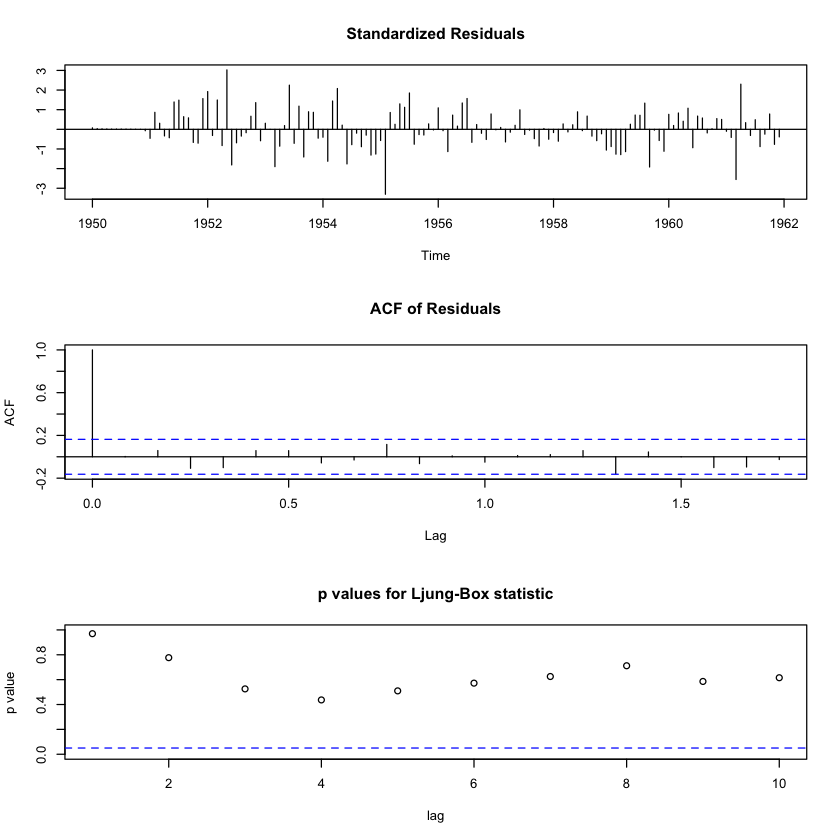

In [229]:
tsdiag(arima.111.111.12)

## Let's take a quick look at the parameter values with their standard errors:

In [214]:
p1 <- -0.4018

In [215]:
se1 <- 0.0896

In [216]:
p2 <- -0.5569

In [217]:
se2 <- 0.0731

In [218]:
t1 <- p1 / se1

In [219]:
t2 <- p2 / se2

In [220]:
c(t1, t2)

[1] -4.484375 -7.618331

In [221]:
length(lair.ts)

[1] 144

In [222]:
df <- length(lair.ts) - 4

## P-values associated with the t-statistics (parameter / se-parameter) from the ARIMA model

In [236]:
# p-value of first parameter
2*pt(t1, df, lower.tail=TRUE)

[1] 1.510658e-05

In [237]:
# p-value of second parameter
2*pt(t2, df, lower.tail=TRUE)

[1] 3.498975e-12

## Model fitted:

> Recall: ARMA(p,q) model can be written as:

> $Y_{t} = \mu + \sum_{k=1}^{p} \phi_{k} (Y_{t-k} - \mu) + \epsilon_{t} + \sum_{i=1}^{q} \theta_{i} \epsilon_{t-i}$,

with finite $\mu$. It can be written as:

> $Y_{t} - \mu - \sum_{k=1}^{p} \phi_{k} (Y_{t-k} - \mu) = \epsilon_{t} + \sum_{i=1}^{q} \theta_{i} \epsilon_{t-i}$

> let $X_{t} = Y_{t} - \mu$

> $(1 - \sum_{k=1}^{p} \phi_{k} L^{k}) X_{t} = (1 + \sum_{i=1}^{q} \theta_{i} L^{i})\epsilon_{t}$

> $\phi(L)X_{t} = \theta(L)\epsilon_{t}$,

where $\phi(L)$ and $\epsilon_{t}$ are the AR and MA characteristic polynomials, respectively.

## Applying the differencing:

### 1) Simple difference operator $\Delta = (1 - L)$ to $Y_{t}$:

> $W_{t} = \Delta Y_{t} = (1 - L)Y_{t}$

>  **WE NOW FIT  THE ARMA(p,q) MODEL TO $W_{t}$, AND THEN WORK BACKWARDS**

> $\phi(L)(W_{t} - \mu) = \theta(L)\epsilon_{t}$

> **Fitting ARMA(0,1) to $W_{t}$**

> $\phi(z) = 1 - \phi_{1} z - \phi_{2} z^{2} - ... - \phi_{p} z^{p}$

> $\theta(z) = 1 + \theta_{1} z + \theta_{2} z^{2} + ... + \theta_{p} z^{p}$

> ARMA(0,1) will have $\phi(L)$ = 1

> ARMA(0,1) will have $\theta(L) = (1 + \theta L)$

> AMRA(0,1) model equation: $(W_{t} - \mu) = (1 + \theta L)\epsilon_{t} = \epsilon_{t} + \theta\epsilon_{t-1}$

> Subbing $W_{t} = \Delta Y_{t} = (1 - L)Y_{t}$ into the ARMA(0,1) produces the ARIMA(0,1,1) model:

> $Y_{t} = \mu + Y_{t-1} +  \epsilon_{t} + \theta\epsilon_{t-1}$

### 2) The general ARIMA model **with seasonal differencing** is called a multiplicative model:

>  $\Delta_{s} = 1 - L^{s}$

> $\Delta_{s}Y_{t} = (1 - L^{s}) Y_{t} = Y_{t} - Y_{t-s}$

> For  seasonal differencing, we again  define a $W_{t}$ ARMA equation, but now $W_{t}$ includes both normal and seasonal differencing:

> $W_{t} = \Delta^{d} \Delta_{s}^{D} Y_{t} = (1 - L)^{d} (1 - L^{s})^{D} Y_{t}$

> You  need to  add seasonal versions of the AR and MA characteristic polynomials: these are called the *seasonal AR characteristic  polynomial, $\Phi(z^{s})$* and the *seasonal MA characteristic polynomial, $\Theta(z^{s})$*

> The seasonal $W_{t}$ ARMA:

> **$\phi(L) \Phi(L^{s}) (W_{t} - \mu) = \theta(L) \Theta(L^{s}) \epsilon_{t}$**

> Where $\Phi(z^{s}) = 1 - \Phi_{1} z^{s} - \Phi_{2} z^{2s} - ... - \Phi_{P} z^{2P}$

> And $\Theta(z^{s}) = 1 + \Theta_{1} z^{s} + \Theta_{2} z^{2s} + ... + \Theta_{Q} z^{Qs}$

> When you sub $W_{t} = (1 - L)^{d} (1 - L^{s})^{D} Y_{t}$ back into the above, then you  have the multiplicative seasonal ARIMA(p,d,q) x (P,D,Q)$_{s}$ model.

## And so finally, the form of the ARIMA(0,1,1) x (0,1,1)$_{s}$ model that we fitted to the airline data:

> $(W_{t} - \mu) = \theta(L) \Theta(L^{12}) \epsilon_{t}$

> $(1 - L) (1 - L^{12}) Y_{t} = \mu +  (1 + \theta L) (1 + \Theta L^{12}) \epsilon_{t}$

> We can multiple this out like usual:

> $(1 - L^{12} - L + L^{13}) Y_{t} = \mu + (1 + \Theta L^{12} + \theta L + \theta \Theta L^{13}) \epsilon_{t}$

> $Y_{t} - Y_{t-12} - Y_{t-1} + Y_{t-13} = \mu + \epsilon_{t} + \Theta \epsilon_{t-12} + \theta  \epsilon_{t-1} + \theta \Theta \epsilon_{t-13}$

In [238]:
arima.111.111.12


Call:
arima(x = lair.ts, order = c(0, 1, 1), seasonal = list(order = c(0, 1, 1), period = 12))

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 estimated as 0.001348:  log likelihood = 244.7,  aic = -483.4

> $\theta = -0.4018$

> $\Theta = -0.5569$

> and therefore $\theta \Theta = -0.4018 \times -0.5569 = 0.2238$

> And so the fitted model is:

> $Y_{t} = Y_{t-12} + Y_{t-1} - Y_{t-13} + \epsilon_{t} -0.5569 \epsilon_{t-12} -0.4018  \epsilon_{t-1} + 0.2238 \epsilon_{t-13}$

---

&nbsp;

&nbsp;

&nbsp;

# Forecasting using R ARIMA model

In [162]:
X <- data.frame(BP.train, 1634:(1634+length(BP.train)-1))
colnames(X) <- c('price','year')

In [163]:
num_years_pred <- 20

BP.fore <-  predict(BP.ar.1, num_years_pred)

In [116]:
pred <- BP.fore$pred

pred.se <- BP.fore$se

In [117]:
num_se <- qt(0.025, 120, lower.tail=FALSE)

In [118]:
L95 <- pred - num_se*pred.se
U95 <- pred + num_se*pred.se

year <- max(X['year']):(max(X['year'])+num_years_pred-1)

In [122]:
BP.PL95 <- data.frame(year, L95, pred, U95, BP.test)

BP.PL95['residuals'] <- BP.PL95['BP.test'] - BP.PL95['pred']

BP.PL95

year,L95,pred,U95,BP.test,residuals
1737,3.229417,5.138416,7.047414,5.0,-0.1384157
1738,3.088823,5.354850,7.620876,6.2,0.8451504
1739,3.096487,5.493270,7.890053,6.4,0.9067300
1740,3.133543,5.581797,8.030051,4.7,-0.8817969
1741,3.169417,5.638414,8.107412,4.1,-1.5384143
1742,3.197192,5.674624,8.152056,3.9,-1.7746240
1743,3.216908,5.697782,8.178656,4.0,-1.6977819
1744,3.230312,5.712593,8.194873,4.9,-0.8125926
1745,3.239209,5.722065,8.204920,4.9,-0.8220647
1746,3.245032,5.728123,8.211213,4.8,-0.9281227


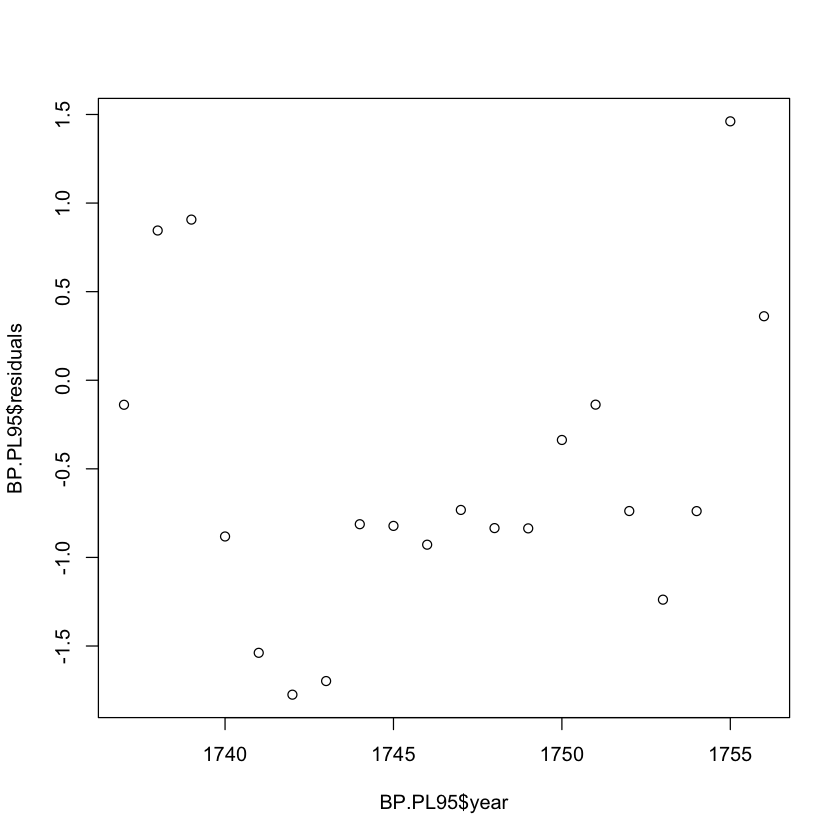

In [131]:
plot(BP.PL95$year, BP.PL95$residuals)

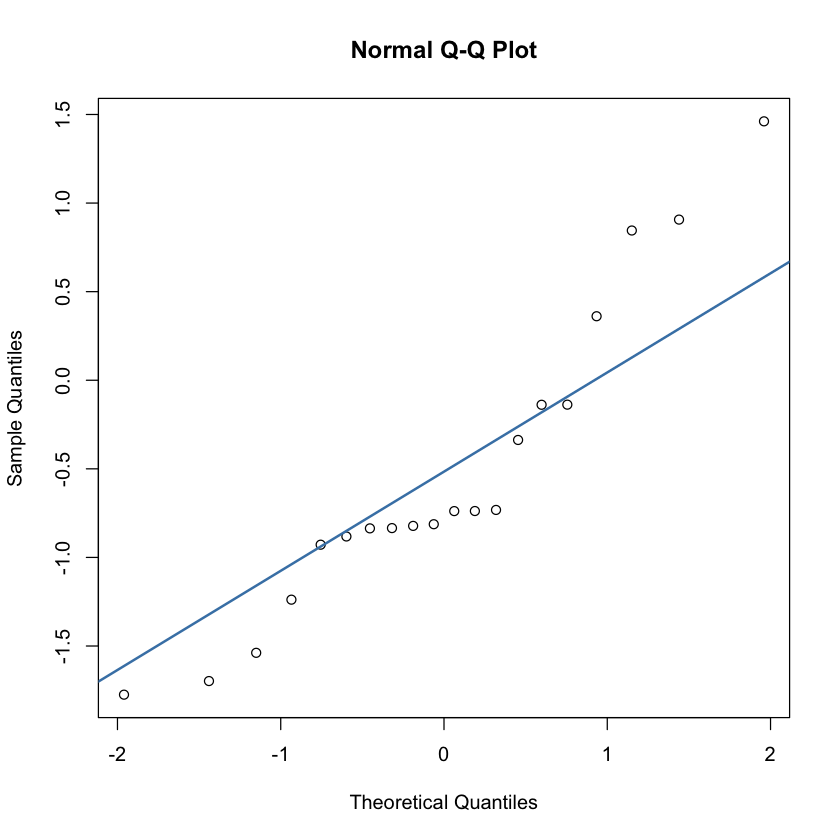

In [137]:
qqnorm(BP.PL95$residuals)
qqline(BP.PL95$residuals, col = "steelblue", lwd = 2)